## Task 1b_partc

## Statement of Goal:
    Explore the ACS data, reduce the dimensionality of quantitative variables and explore if can be linked to patterns in overlaps of ookla and FCC data.

# Part 1: Reduce ACS dimensionality

In [60]:
# This is a library I'm testing, there may be better ways of visualizing this data. 
# If not, this library may be added to a requirements.txt file in the Github Repo
!pip3 install bioinfokit

     |████████████████████████████████| 84 kB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 9.6 MB 488 kB/s eta 0:00:01
     |████████████████████████████████| 231 kB 1.9 MB/s eta 0:00:01
Using legacy 'setup.py install' for bioinfokit, since package 'wheel' is not installed.
Using legacy 'setup.py install' for adjustText, since package 'wheel' is not installed.
Using legacy 'setup.py install' for matplotlib-venn, since package 'wheel' is not installed.
    Running setup.py install for matplotlib-venn ... done
    Running setup.py install for adjustText ... done
    Running setup.py install for bioinfokit ... done
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [75]:
# Imports
import pandas as pd
import numpy as np
import geopandas as gpd

##Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

##Data Viz
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df_acs = pd.read_csv('acs_2019_IL.csv')

In [40]:
df_acs.shape

(3123, 43)

In [41]:
#It would make sense to see as many of the 43 columns as possible
pd.set_option("display.max_columns", 50)

In [42]:
df_acs.head()

,state,county,tract,geoid,f_broadband,f_computer,f_ba,f_black,f_hispanic,log_mhi,mhi,population,households,broadband,computer,black,hispanic,mhi.1,ba,den_computers,n_computer,n_broadband,den_black,n_black,den_hispanic,n_hispanic,den_ba,n_ba,nhh_computer,nhh_broadband,nhh_computer_any_internet,nhh_computer_and_dialup,nhh_computer_and_broadband,nhh_computer_no_internet,nhh_no_computer,den_age,n_children,n_children_computer,n_children_computer_and_dialup,n_children_computer_and_broadband,n_children_computer_no_internet,n_children_no_computer,state_lkp
0,17,1,100,17001000100,0.813,0.861,0.246,0.068,0.000,10.78,48088.0,4761.0,2202.0,81.3,86.1,6.8,0.0,48088.0,24.6,2202.0,1896.0,1791.0,4761.0,324.0,4761.0,0.0,3381.0,831.0,1896,1791,1896,0,1791,105,306,4741,1044,1044,0,978,66,0,17
1,17,1,201,17001000201,0.879,0.940,0.266,0.078,0.016,10.71,44855.0,1985.0,889.0,87.9,94.0,7.8,1.6,44855.0,26.6,889.0,836.0,781.0,1985.0,155.0,1985.0,32.0,1400.0,373.0,836,781,836,5,781,50,53,1961,383,383,0,383,0,0,17
2,17,1,202,17001000202,0.863,0.933,0.221,0.080,0.008,10.83,50375.0,2376.0,970.0,86.3,93.3,8.0,0.8,50375.0,22.1,970.0,905.0,837.0,2376.0,191.0,2376.0,19.0,1527.0,338.0,905,837,905,7,829,69,65,2336,521,521,0,498,23,0,17
3,17,1,400,17001000400,0.691,0.780,0.094,0.182,0.006,10.31,30164.0,3422.0,1316.0,69.1,78.0,18.2,0.6,30164.0,9.4,1316.0,1027.0,909.0,3422.0,624.0,3422.0,20.0,2536.0,238.0,1027,909,1027,9,909,109,289,3147,645,637,0,619,18,8,17
4,17,1,500,17001000500,0.665,0.787,0.113,0.133,0.035,10.62,41008.0,2175.0,813.0,66.5,78.7,13.3,3.5,41008.0,11.3,813.0,640.0,541.0,2175.0,290.0,2175.0,77.0,1455.0,165.0,640,541,640,0,536,104,173,1878,475,458,0,434,24,17,17


In [43]:
df_acs.describe()

,state,county,tract,geoid,f_broadband,f_computer,f_ba,f_black,f_hispanic,log_mhi,mhi,population,households,broadband,computer,black,hispanic,mhi.1,ba,den_computers,n_computer,n_broadband,den_black,n_black,den_hispanic,n_hispanic,den_ba,n_ba,nhh_computer,nhh_broadband,nhh_computer_any_internet,nhh_computer_and_dialup,nhh_computer_and_broadband,nhh_computer_no_internet,nhh_no_computer,den_age,n_children,n_children_computer,n_children_computer_and_dialup,n_children_computer_and_broadband,n_children_computer_no_internet,n_children_no_computer,state_lkp
count,3123.0,3123.00000,3123.000000,3.123000e+03,3.123000e+03,3.123000e+03,3.123000e+03,3.123000e+03,3.123000e+03,3110.000000,3.123000e+03,3123.000000,3123.000000,3.123000e+03,3.123000e+03,3.123000e+03,3.123000e+03,3.123000e+03,3.123000e+03,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.0
mean,17.0,77.84342,550658.070445,1.707839e+10,-1.707679e+04,-1.707671e+04,-1.494257e+04,-1.494271e+04,-1.494274e+04,11.021341,-2.706551e+06,4089.219020,1551.756004,-1.707679e+06,-1.707671e+06,-1.494271e+06,-1.494274e+06,-2.706551e+06,-1.494257e+06,1551.756004,1394.305796,1283.443484,4089.219020,626.099584,4089.219020,700.091899,2781.395773,963.824848,1394.305796,1283.443484,1394.305796,5.422991,1272.642331,116.240474,157.450208,3994.042267,924.236631,899.917707,1.065962,842.127121,56.724624,24.318924,17.0
std,0.0,59.65828,371654.169982,5.960782e+07,3.370392e+05,3.370392e+05,3.153218e+05,3.153218e+05,3.153218e+05,0.498528,4.293418e+07,2008.694842,766.964873,3.370392e+07,3.370392e+07,3.153218e+07,3.153218e+07,4.293418e+07,3.153218e+07,766.964873,741.175944,710.599870,2008.694842,980.364285,2008.694842,1054.395723,1375.622715,893.324306,741.175944,710.599870,741.175944,9.220730,707.715562,90.546020,108.225979,1999.898186,572.032757,568.291095,6.939161,553.018746,79.491556,49.936912,0.0
min,17.0,1.00000,100.000000,1.700100e+10,-6.666667e+06,-6.666667e+06,-6.666667e+06,-6.666667e+06,-6.666667e+06,8.260000,-6.666667e+08,0.000000,0.000000,-6.666667e+08,-6.666667e+08,-6.666667e+08,-6.666667e+08,-6.666667e+08,-6.666667e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.0
25%,17.0,31.00000,71450.000000,1.703171e+10,7.510000e-01,8.480000e-01,1.590000e-01,1.700000e-02,2.600000e-02,10.740000,4.589250e+04,2728.500000,1067.000000,7.510000e+01,8.480000e+01,1.700000e+00,2.600000e+00,4.589250e+04,1.590000e+01,1067.000000,927.000000,832.000000,2728.500000,64.000000,2728.500000,84.500000,1861.000000,342.500000,927.000000,832.000000,927.000000,0.000000,821.500000,56.000000,78.000000,2641.500000,553.000000,537.000000,0.000000,489.000000,0.000000,0.000000,17.0
50%,17.0,43.00000,804102.000000,1.704384e+10,8.230000e-01,8.980000e-01,2.620000e-01,5.200000e-02,7.500000e-02,11.030000,6.132400e+04,3825.000000,1449.000000,8.230000e+01,8.980000e+01,5.200000e+00,7.500000e+00,6.132400e+04,2.620000e+01,1449.000000,1291.000000,1187.000000,3825.000000,204.000000,3825.000000,285.000000,2621.000000,692.000000,1291.000000,1187.000000,1291.000000,0.000000,1174.000000,96.000000,141.000000,3735.000000,833.000000,806.000000,0.000000,743.000000,28.000000,0.000000,17.0
75%,17.0,115.00000,851700.500000,1.711500e+10,8.920000e-01,9.430000e-01,4.530000e-01,1.905000e-01,1.920000e-01,11.350000,8.519600e+04,5111.500000,1915.500000,8.920000e+01,9.430000e+01,1.905000e+01,1.920000e+01,8.519600e+04,4.530000e+01,1915.500000,1734.000000,1619.000000,5111.500000,753.000000,5111.500000,801.000000,3455.000000,1375.000000,1734.000000,1619.000000,1734.000000,9.000000,1606.500000,155.000000,211.000000,4965.000000,1171.500000,1144.500000,0.000000,1085.000000,78.000000,28.000

In [44]:
df_acs.columns

Index(['state', 'county', 'tract', 'geoid', 'f_broadband', 'f_computer',
       'f_ba', 'f_black', 'f_hispanic', 'log_mhi', 'mhi', 'population',
       'households', 'broadband', 'computer', 'black', 'hispanic', 'mhi.1',
       'ba', 'den_computers', 'n_computer', 'n_broadband', 'den_black',
       'n_black', 'den_hispanic', 'n_hispanic', 'den_ba', 'n_ba',
       'nhh_computer', 'nhh_broadband', 'nhh_computer_any_internet',
       'nhh_computer_and_dialup', 'nhh_computer_and_broadband',
       'nhh_computer_no_internet', 'nhh_no_computer', 'den_age', 'n_children',
       'n_children_computer', 'n_children_computer_and_dialup',
       'n_children_computer_and_broadband', 'n_children_computer_no_internet',
       'n_children_no_computer', 'state_lkp'],
      dtype='object')

Looking at the shape, columns and the summary statistics, we see a dataset that is entirely quantitative. Of course, the first few columns are IDs, and not continuous variables. They can be recast as strings. 
This would allow us to lead some work on dimensionality reduction.
Each row is a census tract. Most of the quantitative variables start with a prefix. It may be possible later to check for correlations in terms with the same prefix, especially where the prefixes 'nhh' and 'nh'.
For now, we focus on the subset of non-ID variables.

In [66]:
vars = df_acs[['f_broadband', 'f_computer',
       'f_ba', 'f_black', 'f_hispanic', 'log_mhi', 'mhi', 'population',
       'households', 'broadband', 'computer', 'black', 'hispanic', 'mhi.1',
       'ba', 'den_computers', 'n_computer', 'n_broadband', 'den_black',
       'n_black', 'den_hispanic', 'n_hispanic', 'den_ba', 'n_ba',
       'nhh_computer', 'nhh_broadband', 'nhh_computer_any_internet',
       'nhh_computer_and_dialup', 'nhh_computer_and_broadband',
       'nhh_computer_no_internet', 'nhh_no_computer', 'den_age', 'n_children',
       'n_children_computer', 'n_children_computer_and_dialup',
       'n_children_computer_and_broadband', 'n_children_computer_no_internet',
       'n_children_no_computer']]

In [67]:
# Some basic cleanup
x = vars.dropna()
x = StandardScaler().fit_transform(x)

In [47]:
x

array([[ 0.01930425, -0.34054995, -0.37223559, ...,  0.24028611,
         0.11484295, -0.48793537],
       [ 0.63172947,  0.6891298 , -0.2791258 , ..., -0.83840209,
        -0.71561902, -0.48793537],
       [ 0.48326275,  0.59789235, -0.48862283, ..., -0.62991613,
        -0.42621561, -0.48793537],
       ...,
       [-0.16627914, -0.14504114,  0.27022199, ...,  0.86936982,
         0.42941187,  0.8941038 ],
       [ 0.04714176,  0.45451922,  0.00485907, ..., -0.02983917,
        -0.0487329 , -0.48793537],
       [-0.52816677, -0.2493125 , -0.414135  , ...,  0.00460634,
         0.84464286, -0.14743297]])

In [48]:
#We will start with a high number of components, then use an elbow plot to check for the ideal number
pca = PCA(n_components=6)
x = pca.fit_transform(x)

In [36]:
x

array([[ 1.49731678,  1.30185359],
       [-3.13999406, -2.34876469],
       [-2.68212268, -1.89886739],
       ...,
       [ 3.63844842,  1.9036158 ],
       [-0.54754009, -1.85819309],
       [-0.0786214 ,  0.43217908]])

In [49]:
pca.components_

array([[ 0.1441313 ,  0.14004853,  0.10728138, -0.09533997, -0.00713473,
         0.13696758,  0.12252745,  0.22282545,  0.22184645,  0.1441313 ,
         0.14004853, -0.09533997, -0.00713473,  0.12252745,  0.10728138,
         0.22184645,  0.22952696,  0.23267812,  0.22282545, -0.01923903,
         0.22282545,  0.0558221 ,  0.22585014,  0.20218557,  0.22952696,
         0.23267812,  0.22952696,  0.04055995,  0.23298904,  0.05241751,
        -0.00139505,  0.22487025,  0.18594887,  0.1904288 ,  0.00570456,
         0.19625575, -0.00487228, -0.0373698 ],
       [-0.24834245, -0.22297277, -0.24504409,  0.15179675,  0.10180356,
        -0.2490136 , -0.25693584,  0.12011014,  0.10492512, -0.24834245,
        -0.22297277,  0.15179675,  0.10180356, -0.25693584, -0.24504409,
         0.10492512,  0.06975732,  0.04665444,  0.12011014,  0.18058591,
         0.12011014,  0.14187807,  0.10206207, -0.08730947,  0.06975732,
         0.04665444,  0.06975732,  0.02338666,  0.04432415,  0.22116148,
   

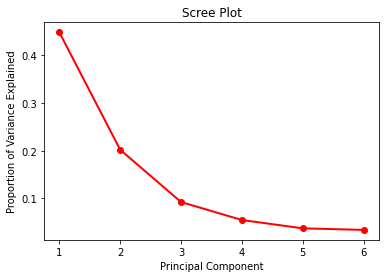

In [52]:
# Plot Values
# Drawn from: https://www.datasklr.com/principal-component-analysis-and-factor-analysis/principal-component-analysis
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

The 'elbow' isn't as clear-cut as in many cases, but the diagram suggests that 2 or 3 may be sufficient. We can double check by exploring proportion of variance explained.

In [54]:
pca.explained_variance_

array([17.04719181,  7.68188417,  3.50946103,  2.07727299,  1.41363175,
        1.28737065])

In [63]:
pc_list = ['PC'+str(i) for i in range(1,7)]

In [69]:
# idea for this viz came from: https://www.reneshbedre.com/blog/principal-component-analysis.html
from bioinfokit.visuz import cluster
cluster.screeplot(obj=[pc_list, pca.explained_variance_ratio_])

From the plot, it seems like 2 PCs account for most of the variance
The next task would be to see if these components are interpretable through their loadings. 

In [71]:
#So let's do the analysis again with just the 2 components
pca = PCA(n_components=2)
x = pca.fit_transform(x)
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=vars.columns)

In [73]:
loadings.T

,f_broadband,f_computer,f_ba,f_black,f_hispanic,log_mhi,mhi,population,households,broadband,computer,black,hispanic,mhi.1,ba,den_computers,n_computer,n_broadband,den_black,n_black,den_hispanic,n_hispanic,den_ba,n_ba,nhh_computer,nhh_broadband,nhh_computer_any_internet,nhh_computer_and_dialup,nhh_computer_and_broadband,nhh_computer_no_internet,nhh_no_computer,den_age,n_children,n_children_computer,n_children_computer_and_dialup,n_children_computer_and_broadband,n_children_computer_no_internet,n_children_no_computer
PC1,0.144131,0.140049,0.107281,-0.095340,-0.007135,0.136968,0.122527,0.222825,0.221846,0.144131,0.140049,-0.095340,-0.007135,0.122527,0.107281,0.221846,0.229527,0.232678,0.222825,-0.019239,0.222825,0.055822,0.225850,0.202186,0.229527,0.232678,0.229527,0.040560,0.232989,0.052418,-0.001395,0.224870,0.185949,0.190429,0.005705,0.196256,-0.004872,-0.037370
PC2,-0.248342,-0.222973,-0.245044,0.151797,0.101804,-0.249014,-0.256936,0.120110,0.104925,-0.248342,-0.222973,0.151797,0.101804,-0.256936,-0.245044,0.104925,0.069757,0.046654,0.120110,0.180586,0.120110,0.141878,0.102062,-0.087309,0.069757,0.046654,0.069757,0.023387,0.044324,0.221161,0.264355,0.119207,0.131564,0.118209,0.031358,0.092613,0.197298,0.161108


In [82]:
print(loadings['PC1'].max(), loadings['PC1'].min())

0.23298904301740694 -0.0953399729968728


In [83]:
print(loadings['PC2'].max(), loadings['PC2'].min())

0.26435463880370247 -0.2569358380687217


None of the loadings of principal components from the original variables are particularly strong. This makes interpretation challenging. Interestingly, PC2 has both a positive and negative loading of around 0.25.
Visualization may help.

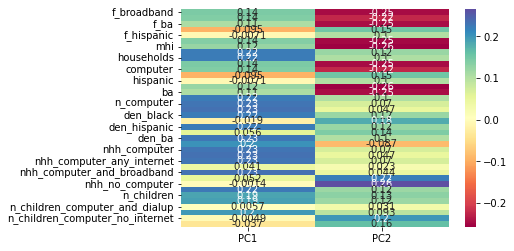

In [81]:
ax = sns.heatmap(loadings, annot=True, cmap='Spectral')
plt.show()

PC2 holds strong negative loadings with some demographic variables such as Monthly Household Income (mhi), number of families from hispanic and 'ba' backgrounds (not sure what 'ba' means). It also has a strong positive loadings correlation with the households that have no computers.

PC1 seems closely linked to variables with the 'nhh' prefix (I believe that's number of households, but we need to check the data dictionary)

# Part 2

In [85]:
illinois_map = gpd.read_file('il_spdf/il_spdf.shp')

<AxesSubplot:>

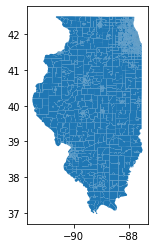

In [86]:

illinois_map.plot()

<AxesSubplot:>

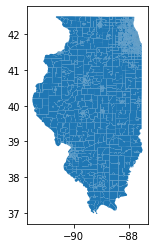

In [87]:
#Using Coordinate Reference System
illinois_map.to_crs(epsg=4326).plot()

In [88]:
# Check for Lat Long in the other data
df_fcc = pd.read_csv('fcc_477_census_tract_IL.csv')
#flatten the tract
df_fcc.columns
#tract and download speeds

Index(['tract', 'max_dn', 'max_up', 'dn10', 'dn100', 'dn250', 'fiber_100u',
       'state'],
      dtype='object')

In [89]:
df_fcc['tract']

0       17001000100
1       17001000201
2       17001000202
3       17001000400
4       17001000500
           ...     
3117    17203030501
3118    17203030502
3119    17203030601
3120    17203030602
3121    17203030700
Name: tract, Length: 3122, dtype: int64

So no, the FCC data doesn't have the required lat-long.


In [90]:
#Ookla
df_ookla = pd.read_csv('ookla_combined_il.csv')
df_ookla.columns

Index(['quadkey', 'avg_d_kbps', 'avg_u_kbps', 'avg_lat_ms', 'tests', 'devices',
       'type', 'quarter', 'year', 'STATEFP', 'COUNTYFP', 'TRACTCE', 'AFFGEOID',
       'GEOID', 'NAME', 'LSAD', 'ALAND', 'AWATER', 'tile'],
      dtype='object')

In [91]:
df_ookla.head()

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,type,quarter,year,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,tile
0,302222301102001,138935,19002,14,80,11,fixed,Q1,2021,17,31,804607,1400000US17031804607,17031804607,8046.07,CT,3639628,7556,"list(c(-88.0609130859375, -88.055419921875, -8..."
1,302222123331111,146129,18342,16,91,16,fixed,Q1,2021,17,31,802610,1400000US17031802610,17031802610,8026.10,CT,1281200,0,"list(c(-87.8961181640625, -87.890625, -87.8906..."
2,302222123232303,219339,15092,14,204,27,fixed,Q1,2021,17,31,804712,1400000US17031804712,17031804712,8047.12,CT,2381498,58189,"list(c(-88.1268310546875, -88.121337890625, -8..."
3,302222221300031,49578,5120,12,4,2,fixed,Q1,2021,17,11,965400,1400000US17011965400,17011965400,9654.00,CT,27569428,0,"list(c(-89.4561767578125, -89.45068359375, -89..."
4,302222310233001,152302,98508,9,76,12,fixed,Q1,2021,17,31,820800,1400000US17031820800,17031820800,8208.00,CT,5632378,404692,"list(c(-87.7532958984375, -87.747802734375, -8..."


In [92]:
df_ookla['tile']

0         list(c(-88.0609130859375, -88.055419921875, -8...
1         list(c(-87.8961181640625, -87.890625, -87.8906...
2         list(c(-88.1268310546875, -88.121337890625, -8...
3         list(c(-89.4561767578125, -89.45068359375, -89...
4         list(c(-87.7532958984375, -87.747802734375, -8...
                                ...                        
199792    list(c(-87.615966796875, -87.6104736328125, -8...
199793    list(c(-88.275146484375, -88.2696533203125, -8...
199794    list(c(-87.9949951171875, -87.989501953125, -8...
199795    list(c(-87.6983642578125, -87.69287109375, -87...
199796    list(c(-87.5830078125, -87.5775146484375, -87....
Name: tile, Length: 199797, dtype: object

In [93]:
df_ookla['tile_length'] = df_ookla['tile'].apply(len)

In [94]:
df_ookla['tile_length']

0         190
1         178
2         190
3         188
4         188
         ... 
199792    189
199793    189
199794    190
199795    188
199796    183
Name: tile_length, Length: 199797, dtype: int64

In [95]:
df_ookla['tile_length'].describe()

count    199797.000000
mean        186.297016
std           4.143248
min         142.000000
25%         185.000000
50%         188.000000
75%         189.000000
max         190.000000
Name: tile_length, dtype: float64

Phew, these tiles are quite complex. I'm best leaving this to Steven and other team members to handle on Tableau and R while I figure out the data overlaps.

# Part 3- Checking for FCC and Ookla Joins

In [96]:
print(len(df_fcc), len(df_ookla))

3122 199797


There are clearly huge differences in the number of quadkeys in Ookla vs the number of census tracts in Illinois. This suggests a close concentration of a huge number of quadkeys within census tracts. And that isn't even considering quadkeys that extends across more than one census tract.

In [97]:
#Left Join Ookla
left_join = df_ookla.merge(df_fcc, how='left', left_on='GEOID', right_on='tract')

In [98]:
left_join

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,type,quarter,year,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,tile,tile_length,tract,max_dn,max_up,dn10,dn100,dn250,fiber_100u,state
0,302222301102001,138935,19002,14,80,11,fixed,Q1,2021,17,31,804607,1400000US17031804607,17031804607,8046.07,CT,3639628,7556,"list(c(-88.0609130859375, -88.055419921875, -8...",190,17031804607,947.486111,33.834889,2.680556,1.375000,0.958333,0.000000,17
1,302222123331111,146129,18342,16,91,16,fixed,Q1,2021,17,31,802610,1400000US17031802610,17031802610,8026.10,CT,1281200,0,"list(c(-87.8961181640625, -87.890625, -87.8906...",178,17031802610,999.518519,49.444444,4.925926,3.555556,2.925926,0.000000,17
2,302222123232303,219339,15092,14,204,27,fixed,Q1,2021,17,31,804712,1400000US17031804712,17031804712,8047.12,CT,2381498,58189,"list(c(-88.1268310546875, -88.121337890625, -8...",190,17031804712,879.825397,43.253968,4.301587,3.000000,2.365079,0.000000,17
3,302222221300031,49578,5120,12,4,2,fixed,Q1,2021,17,11,965400,1400000US17011965400,17011965400,9654.00,CT,27569428,0,"list(c(-89.4561767578125, -89.45068359375, -89...",188,17011965400,704.130769,26.023077,3.330769,0.823077,0.700000,0.000000,17
4,302222310233001,152302,98508,9,76,12,fixed,Q1,2021,17,31,820800,1400000US17031820800,17031820800,8208.00,CT,5632378,404692,"list(c(-87.7532958984375, -87.747802734375, -8...",188,17031820800,766.280952,361.804571,2.552381,1.561905,1.076190,0.342857,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199792,320002310110012,2297,60,132,2,1,mobile,Q2,2021,17,59,972800,1400000US17059972800,17059972800,9728.00,CT,419852681,8795239,"list(c(-87.615966796875, -87.6104736328125, -8...",189,17059972800,583.457077,58.192575,1.914153,1.106729,0.584687,0.415313,17
199793,320002320311012,28478,5456,69,3,1,mobile,Q2,2021,17,151,971300,1400000US17151971300,17151971300,9713.00,CT,333545835,10811618,"list(c(-88.275146484375, -88.2696533203125, -8...",189,17151971300,140.398876,101.987461,1.814607,1.196629,0.028090,0.904494,17
199794,320002321103321,2989,1704,111,3,1,mobile,Q2,2021,17,69,971000,1400000US17069971000,17069971000,9710.00,CT,270330958,8628926,"list(c(-87.9949951171875, -87.989501953125, -8...",190,17069971000,102.247191,100.000000,1.033708,1.022472,0.000000,1.000000,17
199795,320002330100231,1787,142,76,4,3,mobile,Q2,2021,17,69,971000,1400000US17069971000,17069971000,9710.00,CT,270330958,8628926,"list(c(-87.6983642578125, -87.69287109375, -87...",188,17069971000,102.247191,100.000000,1.033708,1.022472,0.000000,1.000000,17


In [107]:
missing_tract = left_join.loc[left_join['tract'].isnull()]
missing_tract

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,type,quarter,year,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,tile,tile_length,tract,max_dn,max_up,dn10,dn100,dn250,fiber_100u,state


Okay, so every single quadkey is in at least one tract. Let's try the reverse.

In [101]:
right_join = df_ookla.merge(df_fcc, how='right', left_on='GEOID', right_on='tract')

In [105]:
missing_geoid = right_join.loc[right_join['GEOID'].isnull()]
missing_geoid

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,type,quarter,year,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,tile,tile_length,tract,max_dn,max_up,dn10,dn100,dn250,fiber_100u,state
19004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17019000401,988.733333,163.666667,2.333333,1.333333,1.133333,0.066667,17
24546,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17031010702,983.179487,74.358974,5.512821,4.358974,2.666667,0.025641,17
24547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17031020100,981.257143,50.000000,5.228571,4.171429,2.571429,0.000000,17
24722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17031030102,996.454545,136.363636,5.090909,4.000000,2.727273,0.090909,17
24723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17031030103,878.272727,136.363636,4.454545,3.545455,2.090909,0.090909,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17043841207,966.964286,82.857143,5.785714,3.428571,2.928571,0.035714,17
66649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17043846310,918.629630,318.380741,1.518519,1.222222,1.222222,0.296296,17
83992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17087980000,104.285714,86.714286,1.428571,1.142857,0.000000,0.857143,17
99613,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17097863005,707.261905,25.335619,0.904762,0.714286,0.714286,0.000000,17


All right, so there are 162 quadkeys that don't have a tract.

The next step would have been to plot against the shapefile and see which parts become blank. Steven is already taking care of that on Tableau. So I'll just compare the results of the right join with ACS and check for any patterns appearing with respect to our calculated principal components. 